# CPSC479/579 Assignment 0：Warm-up #


- Name: Muyi Aghedo
- NetID: mna28

# Part 1: Numpy and MatplotLib

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [3]:
import numpy as np

## 1.1 Numpy Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [4]:
# Create a rank 1 array
a = np.array([1, 2, 3])
print("Rank 1 array:")
print(f"Type: {type(a)}, Shape: {a.shape}, Elements: {a[0]}, {a[1]}, {a[2]}")

Rank 1 array:
Type: <class 'numpy.ndarray'>, Shape: (3,), Elements: 1, 2, 3


In [5]:
# Modify an element of the array
a[0] = 5
print("Modified array:")
print(a)

Modified array:
[5 2 3]


In [6]:
# Create a rank 2 array
b = np.array([[1, 2, 3], [4, 5, 6]])
print("Rank 2 array:")
print(b)
print(f"Shape: {b.shape}")
print(f"Elements: b[0, 0] = {b[0, 0]}, b[0, 1] = {b[0, 1]}, b[1, 0] = {b[1, 0]}")

Rank 2 array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)
Elements: b[0, 0] = 1, b[0, 1] = 2, b[1, 0] = 4


Numpy also provides many functions to create arrays:

In [7]:
# Create an array of all zeros
a = np.zeros((2, 2))
print("Array of all zeros:")
print(a)

Array of all zeros:
[[0. 0.]
 [0. 0.]]


In [8]:
# Create an array of all ones
b = np.ones((1, 2))
print("Array of all ones:")
print(b)

Array of all ones:
[[1. 1.]]


In [9]:
# Create a constant array
c = np.full((2, 2), 7)
print("Constant array filled with 7:")
print(c)

Constant array filled with 7:
[[7 7]
 [7 7]]


In [10]:
# Create a 2x2 identity matrix
d = np.eye(2)
print("2x2 Identity matrix:")
print(d)

2x2 Identity matrix:
[[1. 0.]
 [0. 1.]]


In [11]:
# Create an array filled with random values
e = np.random.random((2, 2))
print("\nArray filled with random values:")
print(e)


Array filled with random values:
[[0.1696516  0.96518637]
 [0.94416631 0.39775976]]


## 1.2 Array Indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [12]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

# Extract a subarray: first 2 rows and columns 1 and 2
b = a[:2, 1:3]
print("Subarray b:\n", b)

Subarray b:
 [[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [13]:
# Show that b references the same data as the original array
print("Original value at a[0, 1]:", a[0, 1])
b[0, 0] = 77  # Modify b[0, 0], which is the same as a[0, 1]
print("Modified value at a[0, 1]:", a[0, 1])

Original value at a[0, 1]: 2
Modified value at a[0, 1]: 77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [14]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print("Array a:\n", a)

Array a:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [15]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print("Row r1:", row_r1, "Shape:", row_r1.shape)
print("Row r2:", row_r2, "Shape:", row_r2.shape)
print("Row r3:", row_r3, "Shape:", row_r3.shape)

Row r1: [5 6 7 8] Shape: (4,)
Row r2: [[5 6 7 8]] Shape: (1, 4)
Row r3: [[5 6 7 8]] Shape: (1, 4)


In [16]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print("Column r1:", col_r1, "Shape:", col_r1.shape)
print("Column r2:\n", col_r2, "\nShape:", col_r2.shape)

Column r1: [ 2  6 10] Shape: (3,)
Column r2:
 [[ 2]
 [ 6]
 [10]] 
Shape: (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [17]:
a = np.array([[1, 2], [3, 4], [5, 6]])

# An example of integer array indexing.
print(a[[0, 1, 2], [0, 1, 0]])  # Elements: a[0,0], a[1,1], a[2,0]
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Equivalent to the above

[1 4 5]
[1 4 5]


In [18]:
# When using integer array indexing, you can reuse the same element from the source array:
print(a[[0, 0], [1, 1]])  # Elements: a[0,1], a[0,1]
print(np.array([a[0, 1], a[0, 1]]))  # Equivalent to the above

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [19]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print("Array a:\n", a)

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print("\nElements selected with integer array indexing:\n", a[np.arange(4), b])

Array a:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Elements selected with integer array indexing:
 [ 1  6  7 11]


In [20]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print("Modified array a:\n", a)

Modified array a:
 [[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [21]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print("Boolean index array:\n", bool_idx)

Boolean index array:
 [[False False]
 [ True  True]
 [ True  True]]


In [22]:
# Use boolean indexing to extract elements
print("Elements greater than 2:", a[bool_idx])

# Perform the above in a single statement
print("Elements greater than 2 (single statement):", a[a > 2])

Elements greater than 2: [3 4 5 6]
Elements greater than 2 (single statement): [3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

## 1.3 Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [23]:
# Let NumPy Choose the Data Type
x = np.array([1, 2])  # NumPy automatically infers the data type (int)
y = np.array([1.0, 2.0])  # NumPy automatically infers the data type (float)
print("Array x:", x)
print("Data type of x:", x.dtype)
print("\nArray y:", y)
print("Data type of y:", y.dtype)

Array x: [1 2]
Data type of x: int32

Array y: [1. 2.]
Data type of y: float64


In [24]:
# Specify a Particular Data Type
z = np.array([1, 2], dtype=np.int64)  # Explicitly specify int64 data type
print("Array z:", z)
print("Data type of z:", z.dtype)

Array z: [1 2]
Data type of z: int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## 1.4 Array Operation

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [25]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print("Elementwise sum:")
print(x + y)
print(np.add(x, y))

Elementwise sum:
[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [26]:
# Elementwise difference; both produce the array
print("Elementwise difference:")
print(x - y)
print(np.subtract(x, y))

Elementwise difference:
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [27]:
# Elementwise product; both produce the array
print("Elementwise product:")
print(x * y)
print(np.multiply(x, y))

Elementwise product:
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [28]:
# Elementwise division; both produce the array
print("Elementwise division:")
print(x / y)
print(np.divide(x, y))

Elementwise division:
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [29]:
# Elementwise square root; produces the array
print("Elementwise square root:")
print(np.sqrt(x))

Elementwise square root:
[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [30]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; all produce 219
print("Inner product of vectors:")
print(v.dot(w))  # Using method
print(np.dot(v, w))  # Using NumPy function
print(v @ w)  # Using "@" operator which is equivalent to numpy's dot operator

Inner product of vectors:
219
219
219


In [31]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Matrix / vector product; all produce the rank 1 array [29 67]
print("Matrix-vector product:")
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

Matrix-vector product:
[29 67]
[29 67]
[29 67]


In [32]:
# Matrix / matrix product; all produce the rank 2 array
# [[19 22]
#  [43 50]]
print("Matrix-matrix product:")
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

Matrix-matrix product:
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [33]:
x = np.array([[1,2],[3,4]])

print("Summing elements:")
print("Sum of all elements:", np.sum(x))
print("Sum of each column:", np.sum(x, axis=0))  # Sum along columns
print("Sum of each row:", np.sum(x, axis=1))  # Sum along rows

Summing elements:
Sum of all elements: 10
Sum of each column: [4 6]
Sum of each row: [3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [34]:
print("Original matrix:\n", x)
print("Transposed matrix:\n", x.T)

Original matrix:
 [[1 2]
 [3 4]]
Transposed matrix:
 [[1 3]
 [2 4]]


In [35]:
v = np.array([[1, 2, 3]])
print("Rank 2 array (1x3):\n", v)
print("Transposed (3x1):\n", v.T)

Rank 2 array (1x3):
 [[1 2 3]]
Transposed (3x1):
 [[1]
 [2]
 [3]]


## 1.5 Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [36]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print("Result using an explicit loop:\n", y)

Result using an explicit loop:
 [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [37]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print("Explicitly tiled vector:", vv)

Explicitly tiled vector: [[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [38]:
y = x + vv  # Add x and vv elementwise
print("Result using explicitly tiled vector:\n", y)

Result using explicitly tiled vector:
 [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [39]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print("Result using broadcasting:\n", y)

Result using broadcasting:
 [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [40]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
outer_product = np.reshape(v, (3, 1)) * w
print("Outer product of v and w:\n", outer_product)

Outer product of v and w:
 [[ 4  5]
 [ 8 10]
 [12 15]]


In [41]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
print("Adding vector v to each row of matrix x:\n", x + v)

Adding vector v to each row of matrix x:
 [[2 4 6]
 [5 7 9]]


In [42]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
result = (x.T + w).T
print("Adding vector w to each column of matrix x (via transpose):\n", result)

Adding vector w to each column of matrix x (via transpose):
 [[ 5  6  7]
 [ 9 10 11]]


In [43]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
result_reshaped = x + np.reshape(w, (2, 1))
print("Adding vector w to each column of matrix x (via reshaping):\n", result_reshaped)

Adding vector w to each column of matrix x (via reshaping):
 [[ 5  6  7]
 [ 9 10 11]]


In [44]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
scalar_multiplication = x * 2
print("Multiplying matrix x by a scalar:\n", scalar_multiplication)

Multiplying matrix x by a scalar:
 [[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## 1.6 Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [45]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [46]:
%matplotlib inline

### 1.6.1 Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

In [47]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

In [48]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### 1.6.2 Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

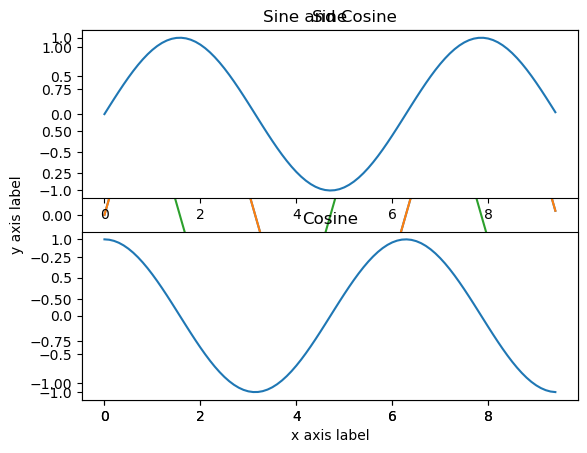

In [49]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Your Try

Use numpy and matplotlib to simulate and visualize temperature changes over time for different layers of the Earth's atmosphere. Assume three layers (e.g., Troposphere, Stratosphere, Mesosphere). Perform the following tasks to draw a polyline for each layer:

1.	Generate a 2D array temperatures with dimensions 3 (layers) x 365 (days). Initialize this array with base temperatures for each layer: Troposphere=15°C, Stratosphere=-15°C, Mesosphere=-55°C.

2.	Simulate daily temperature fluctuations for each layer over a year, where fluctuations are normally distributed with a mean of 0°C and a standard deviation of 5°C for Troposphere, 10°C for Stratosphere, and 15°C for Mesosphere.

3.	Calculate and plot the average ***monthly*** temperature for each layer.

4.	Highlight the coldest and warmest month for each layer on the plot.

A sample plot is shown below:

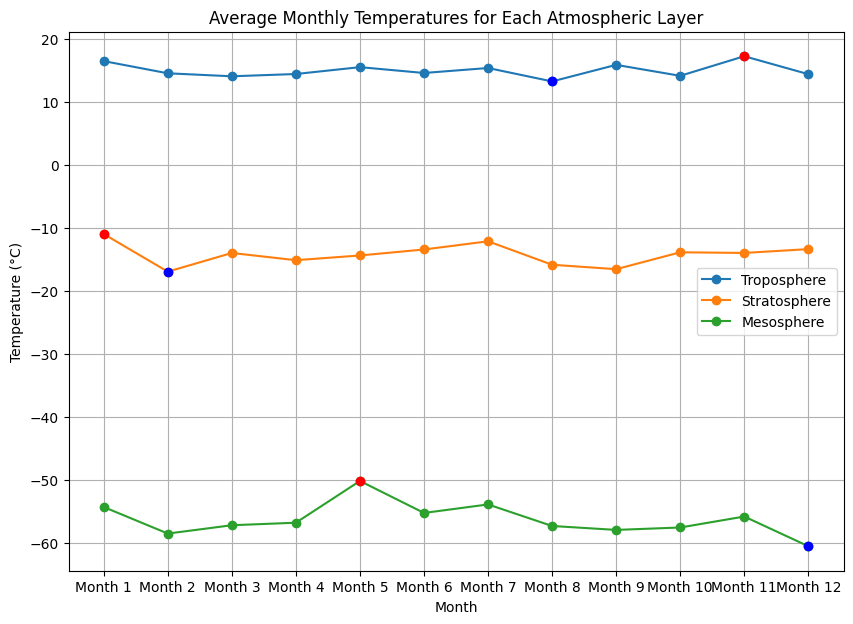

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Array
trop = [15.0 for i in range(0, 365)]
strat = [-15.0 for i in range(0, 365)]
mes = [-55.0 for i in range(0, 365)]
base_temperatures = np.array([trop, strat, mes])

# 2. Daily temperature fluctuations
deviations = [5, 10, 15]
for i in range(0, 3):
    fluctuations = np.random.normal(0, deviations[i], 365)
    base_temperatures[i] += fluctuations

# 3. Average monthly temperature
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
cumulative_days = [0] + [sum(days_per_month[:i+1]) for i in range(len(days_per_month))]
monthly_averages = []
mins_maxes = []

for i in range(0, 3):
    layer = []
    for j in range(0, 12):
        avg = np.mean(base_temperatures[i][cumulative_days[j]:cumulative_days[j + 1]])
        layer.append(avg)
    monthly_averages.append(layer)
    mins_maxes.append((np.min(layer), np.argmin(layer), np.max(layer), np.argmax(layer)))

monthly_averages = np.array(monthly_averages)

# 4. Plot
labels = ["Troposhere", "Stratosphere", "Mesosphere"]
fig, ax = plt.subplots()
for i in range(0, 3):
    ax.plot(["Month " + str(j) for j in range(0, 12)], monthly_averages[i], marker='o', label = labels[i])
fig.autofmt_xdate()
plt.legend()
plt.grid()

# 4b Highlighting
# print(mins_maxes)

for min_max in mins_maxes:
    ax.plot(min_max[1], min_max[0],'bo') # Fine
    ax.plot(min_max[3], min_max[2],'ro')


# Part 2: Basic Image I/O

In this part, we will use PIL.Image and Numpy to read, write and apply some simple operations on an image.

## 2.1 Import PIL.Image

In [51]:
from PIL import Image

## 2.2 Read an Image

In [52]:
# Replace the image_path with the path to your image file
image_path = "./test_image.png"
image = Image.open(image_path)

## 2.3 Display the Image

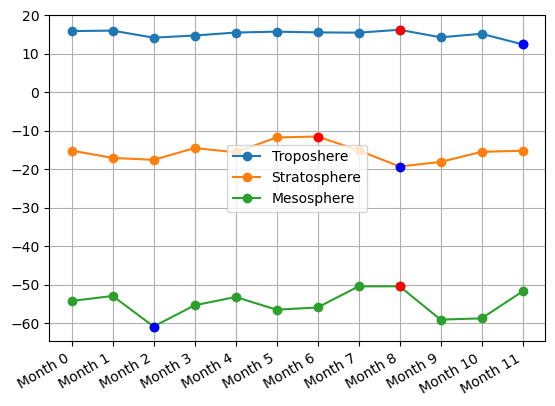

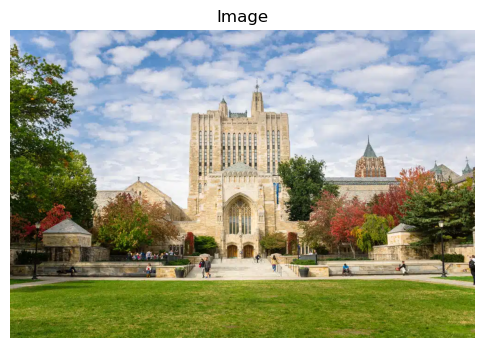

In [53]:
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Image")
plt.axis("off")
plt.show()

## 2.4 Convert the Image to Numpy

In [54]:
image_array = np.array(image)
print("Image Shape:", image_array.shape)  # Prints the dimensions of the image
print("Image Data Type:", image_array.dtype)  # Prints the data type of the array

Image Shape: (662, 1000, 3)
Image Data Type: uint8


## 2.5 Display Indivisual R/G/B Channels

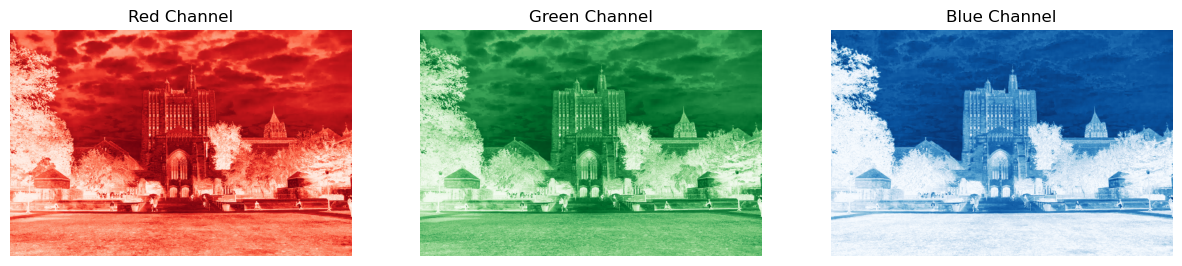

In [55]:
import matplotlib.pyplot as plt

# Display individual color channels (R, G, B)
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Plot the channels
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap="Reds")
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap="Greens")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap="Blues")
plt.title("Blue Channel")
plt.axis("off")

plt.show()

## 2.6 Modify and Save the Image

In [56]:
# Take Gaussian Blur as an example

# Function to create a Gaussian kernel
def create_gaussian_kernel(size, sigma):
    """
    Create a 2D Gaussian kernel.
    :param size: Kernel size (should be odd, e.g., 3, 5, 7, etc.)
    :param sigma: Standard deviation of the Gaussian distribution
    :return: A 2D Gaussian kernel
    """
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()  # Normalize the kernel
    return kernel

# Function to apply Gaussian blur using NumPy
def apply_gaussian_blur(image_array, kernel_size=5, sigma=1.0):
    """
    Apply Gaussian blur to an image using NumPy.
    :param image_array: Input image as a NumPy array
    :param kernel_size: Size of the Gaussian kernel (should be odd)
    :param sigma: Standard deviation of the Gaussian kernel
    :return: Blurred image as a NumPy array
    """
    kernel = create_gaussian_kernel(kernel_size, sigma)
    padding = kernel_size // 2

    # Pad the image to handle edges
    padded_image = np.pad(image_array,
                          ((padding, padding), (padding, padding), (0, 0)),
                          mode='edge')

    # Initialize the output image
    blurred_image = np.zeros_like(image_array, dtype=np.float64)

    # Convolution operation
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            for c in range(image_array.shape[2]):  # For each color channel
                region = padded_image[i:i + kernel_size, j:j + kernel_size, c]
                blurred_image[i, j, c] = np.sum(region * kernel)

    return np.clip(blurred_image, 0, 255).astype(np.uint8)

# Apply Gaussian Blur
modified_image_array = apply_gaussian_blur(image_array, kernel_size=20)

In [57]:
# Convert the modified image back to PIL image and save
modified_image = Image.fromarray(modified_image_array)
modified_image.save("modified_image.jpg")

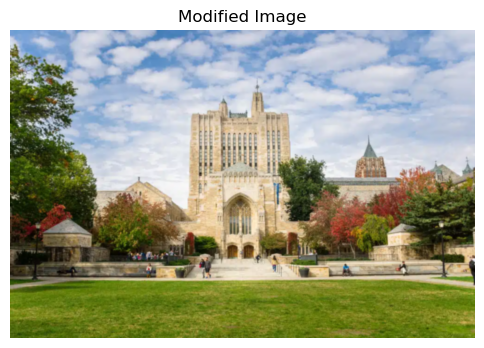

In [58]:
# Display the modified image
plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.title("Modified Image")
plt.axis("off")
plt.show()

## Your Try
Compute a monochrome edge map of the given image. You can compute the edge with whatever reasonable way, as long as it correctly illustrates the geometric contour of the image. A sample edge map is shown as follows:
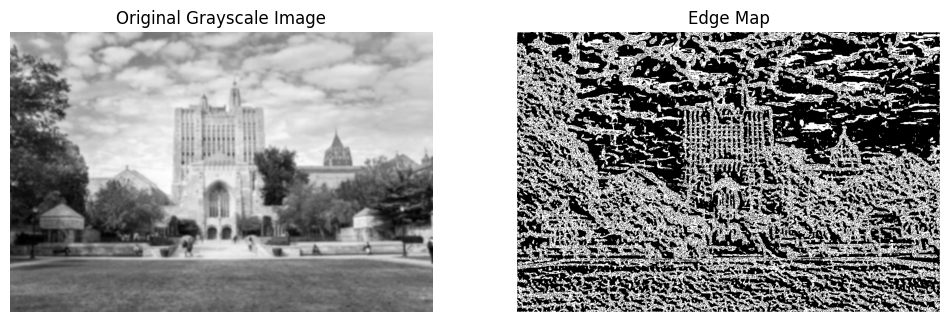

You are free to use libraries to perfrom the operation. Plot your result with the original image side by side as shown above.

Reference to edge detection using Sobel operator can be found [here](https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm).

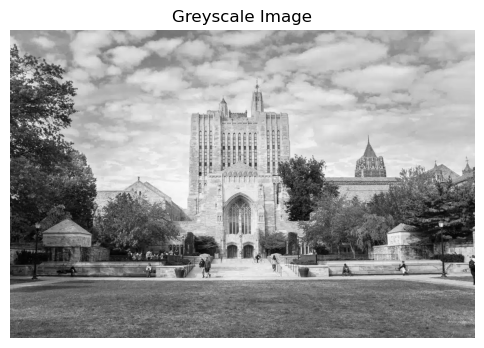

In [67]:
# Read the image
image_path_2 = "./test_image.png"
image_2 = Image.open(image_path).convert('LA')

def showImage(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

showImage(image_2, "Greyscale Image")


In [68]:
# Convert to array
image_array_2 = np.array(image_2)
print("Image Shape:", image_array_2.shape)  # Prints the dimensions of the image
print("Image Data Type:", image_array_2.dtype)  # Prints the data type of the array

sobel_kernel = np.array([[-1, 0, 1]
                        ,[-2, 0, 2]
                        ,[-1, 0, 1]])

Image Shape: (662, 1000, 2)
Image Data Type: uint8


In [69]:
def apply_convolution(image_array, kernel):
    """
    Apply Gaussian blur to an image using NumPy.
    :param image_array: Input image as a NumPy array
    :param kernel_size: Size of the Gaussian kernel (should be odd)
    :param sigma: Standard deviation of the Gaussian kernel
    :return: Blurred image as a NumPy array
    """
    kernel_size = len(kernel)
    other_kernel = kernel.T
    padding = kernel_size // 2

    # Pad the image to handle edges
    padded_image = np.pad(image_array,
                          ((padding, padding), (padding, padding), (0, 0)),
                          mode='edge')

    # Initialize the output image
    blurred_image = np.zeros_like(image_array, dtype=np.float64)

    # Convolution operation
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
                region = padded_image[i:i + kernel_size, j:j + kernel_size, 0]
                sum = np.sqrt(pow(np.sum(region * kernel), 2) + pow(np.sum(region * other_kernel), 2))
                blurred_image[i, j, 0] = sum
                blurred_image[i, j, 1] = 255

    return np.clip(blurred_image, 0, 255).astype(np.uint8)

In [70]:
# Apply sobel operation
sobel = apply_convolution(image_array_2, sobel_kernel)

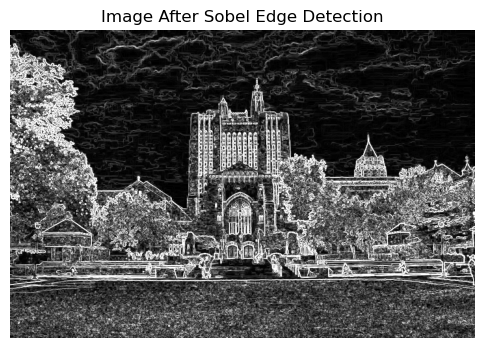

In [71]:
# Display and save image
edged_image = Image.fromarray(sobel)

showImage(edged_image, "Image After Sobel Edge Detection")

edged_image.save("edgemap_image.png")
